In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost
from sklearn import svm


In [ ]:
""" Loading dataset """

data = '/content/CollegeWorkforceAttrition1.csv'
df = pd.read_csv(data)
df.head(5)


,Gender,Qualification,Speciality,MaritalStatus,Salary,Department,Designation,YearOfJoining,WorkExperince,NoOfCollegesWorked,...,YearSinceLastPromotion,WorkRelationshipSatisfaction,ResearchCulture,FacultyDevelopemnt,LadiesFacilities,FamilyMdeicalClaim,Insurance,YearlyLeaves,CompensationOffDays,IntentionToQuit
0,Female,ME,Computer,1,2,Computer Engineering,Assistant Professor,2021,16.0,3,...,Yes,4,2,1,0,0,0,15,1,1
1,Female,MTECH,Computer,1,2,Computer Engineering,Assistant Professor,2014,14.0,2,...,Yes,5,4,1,1,0,0,15,1,0
2,Female,MTECH,Computer,1,2,Computer Engineering,Assistant Professor,2021,1.5,1,...,No,5,3,0,0,0,0,15,1,1
3,Female,MTECH,Computer,1,1,Computer Engineering,Assistant Professor,2021,6.0,4,...,No,3,2,1,0,0,0,15,0,0
4,Male,MTECH,Information Technology,1,2,Computer Engineering,Assistant Professor,2022,11.5,2,...,No,5,5,0,0,0,0,15,1,0


In [ ]:
df.columns

Index(['Gender', 'Qualification', 'Speciality', 'MaritalStatus', 'Salary',
       'Department', 'Designation', 'YearOfJoining', 'WorkExperince',
       'NoOfCollegesWorked', 'DistanceFromHome', 'DepartmentOvertime',
       'WorkLifeBalance', 'YearSinceLastPromotion',
       'WorkRelationshipSatisfaction', 'ResearchCulture', 'FacultyDevelopemnt',
       'LadiesFacilities', 'FamilyMdeicalClaim', 'Insurance', 'YearlyLeaves',
       'CompensationOffDays', 'IntentionToQuit'],
      dtype='object')

In [ ]:
df.shape

(50, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        50 non-null     object 
 1   Qualification                 50 non-null     object 
 2   Speciality                    50 non-null     object 
 3   MaritalStatus                 50 non-null     int64  
 4   Salary                        50 non-null     int64  
 5   Department                    50 non-null     object 
 6   Designation                   50 non-null     object 
 7   YearOfJoining                 50 non-null     int64  
 8   WorkExperince                 50 non-null     float64
 9   NoOfCollegesWorked            50 non-null     int64  
 10  DistanceFromHome              50 non-null     float64
 11  DepartmentOvertime            50 non-null     int64  
 12  WorkLifeBalance               50 non-null     int64  
 13  YearSin

In [ ]:
""" Transpose the describe to make it easier to read. """
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,50.0,0.900,0.303046,0.0,1.0,1.0,1.00,1.0
Salary,50.0,2.300,1.092647,1.0,2.0,2.0,3.00,4.0
YearOfJoining,50.0,2017.380,4.313671,2002.0,2015.0,2017.5,2021.00,2022.0
WorkExperince,50.0,9.824,6.184528,0.3,5.0,9.0,14.00,26.0
NoOfCollegesWorked,50.0,2.480,1.232883,0.0,2.0,2.0,3.00,6.0
DistanceFromHome,50.0,9.680,6.809177,3.0,5.0,7.0,12.75,30.0
DepartmentOvertime,50.0,1.660,1.061574,0.0,1.0,2.0,2.00,5.0
WorkLifeBalance,50.0,3.200,1.106567,1.0,2.0,3.0,4.00,5.0
WorkRelationshipSatisfaction,50.0,3.780,1.130107,1.0,3.0,4.0,5.00,5.0
ResearchCulture,50.0,2.900,0.974156,1.0,2.0,3.0,3.75,5.0


In [ ]:
df.drop(['YearOfJoining'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Gender                          0
Qualification                   0
Speciality                      0
MaritalStatus                   0
Salary                          0
Department                      0
Designation                     0
WorkExperince                   0
NoOfCollegesWorked              0
DistanceFromHome                0
DepartmentOvertime              0
WorkLifeBalance                 0
YearSinceLastPromotion          0
WorkRelationshipSatisfaction    0
ResearchCulture                 0
FacultyDevelopemnt              0
LadiesFacilities                0
FamilyMdeicalClaim              0
Insurance                       0
YearlyLeaves                    0
CompensationOffDays             0
IntentionToQuit                 0
dtype: int64

Visulazing categorical values

In [ ]:
gender_dict = df["Gender"].value_counts()
gender_dict

Female    32
Male      18
Name: Gender, dtype: int64

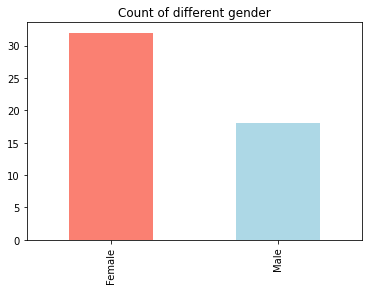

In [ ]:
df['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

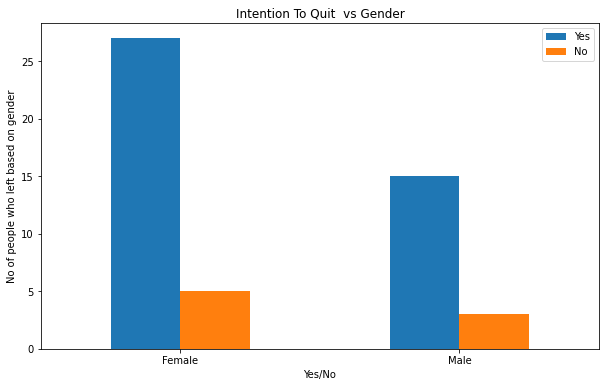

In [ ]:
#Create a plot for crosstab

pd.crosstab(df['Gender'],df['IntentionToQuit']).plot(kind="bar",figsize=(10,6))
plt.title("Intention To Quit  vs Gender")
plt.xlabel("Yes/No")
plt.ylabel("No of people who left based on gender")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

In [ ]:
promoted_dict = df["YearSinceLastPromotion"].value_counts()
promoted_dict


No     29
Yes    21
Name: YearSinceLastPromotion, dtype: int64

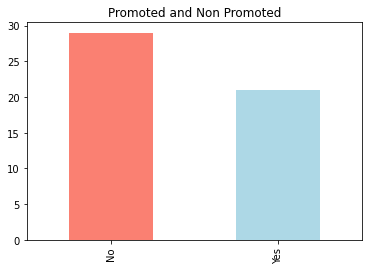

In [ ]:
df['YearSinceLastPromotion'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Promoted and Non Promoted")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

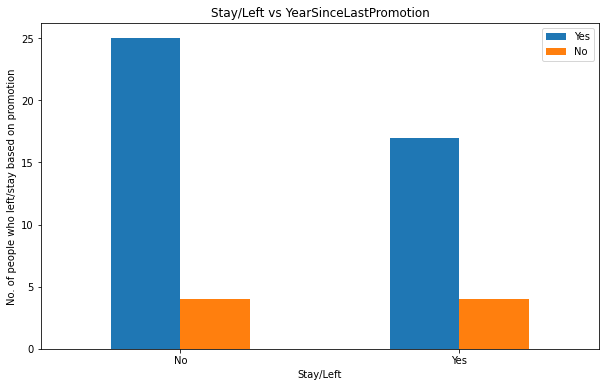

In [ ]:
#Create a plot for crosstab

pd.crosstab(df['YearSinceLastPromotion'],df['IntentionToQuit']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs YearSinceLastPromotion")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

In [ ]:
func_dict = df["Department"].value_counts()
func_dict

Computer Engineering    36
CSBS                    14
Name: Department, dtype: int64

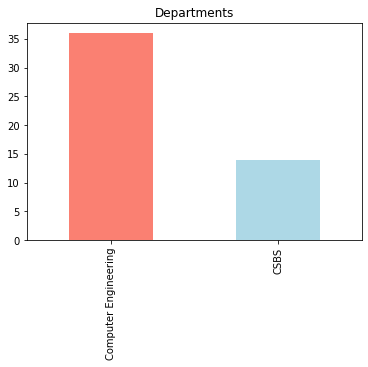

In [ ]:
df['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Departments")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

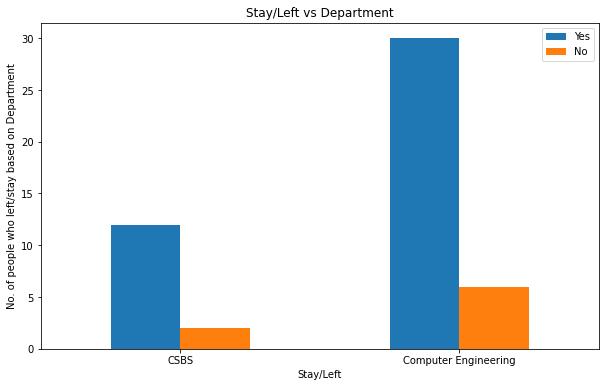

In [ ]:
#Create a plot for crosstab

pd.crosstab(df['Department'],df['IntentionToQuit']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Department")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on Department")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

In [ ]:
Marital_dict = df["MaritalStatus"].value_counts()
print(Marital_dict)

1    45
0     5
Name: MaritalStatus, dtype: int64


Visulization of Continuous data

In [ ]:
df.corr()

,MaritalStatus,Salary,WorkExperince,NoOfCollegesWorked,DistanceFromHome,DepartmentOvertime,WorkLifeBalance,WorkRelationshipSatisfaction,ResearchCulture,FacultyDevelopemnt,LadiesFacilities,FamilyMdeicalClaim,Insurance,YearlyLeaves,CompensationOffDays,IntentionToQuit
MaritalStatus,1.000000,0.030817,0.147220,0.076472,0.137473,-0.044406,-0.121716,0.172812,0.172825,0.036370,-0.098513,0.197583,0.045596,-0.062994,0.093633,-0.036370
Salary,0.030817,1.000000,0.721918,0.360561,0.194206,0.036948,0.101274,0.004958,0.047933,0.171481,0.042936,0.257137,0.510058,0.227128,0.181785,-0.070610
WorkExperince,0.147220,0.721918,1.000000,0.663849,0.386551,-0.026708,0.082186,0.335691,0.171810,0.186162,0.036604,0.200992,0.402818,0.120198,0.206150,-0.131807
NoOfCollegesWorked,0.076472,0.360561,0.663849,1.000000,0.203427,0.096053,0.047869,0.238461,0.142736,0.350438,0.074720,0.103110,0.401980,0.074324,0.165710,-0.126944
DistanceFromHome,0.137473,0.194206,0.386551,0.203427,1.000000,-0.069002,-0.117279,0.007903,0.059687,-0.113791,-0.062258,-0.117292,-0.073324,0.069529,-0.070604,0.105698
DepartmentOvertime,-0.044406,0.036948,-0.026708,0.096053,-0.069002,1.000000,-0.236274,-0.216722,-0.191424,0.066447,0.290063,0.148385,0.018223,-0.187021,-0.107681,0.193112
WorkLifeBalance,-0.121716,0.101274,0.082186,0.047869,-0.117279,-0.236274,1.000000,0.313334,0.075728,-0.119523,0.092499,-0.066597,-0.149844,0.207020,0.131876,-0.129483
WorkRelationshipSatisfaction,0.172812,0.004958,0.335691,0.238461,0.007903,-0.216722,0.313334,1.000000,0.572815,0.206759,-0.254358,0.075807,-0.168731,0.064191,0.356540,-0.450578
ResearchCulture,0.172825,0.047933,0.171810,0.142736,0.059687,-0.191424,0.075728,0.572815,1.000000,0.181025,-0.161986,0.108746,0.014184,-0.019597,0.403631,-0.520447
FacultyDevelopemnt,0.036370,0.171481,0.186162,0.350438,-0.113791,0.066447,-0.119523,0.206759,0.181025,1.000000,0.032246,0.134323,0.134323,0.072169,0.253947,-0.404762


In [ ]:
def Promoted(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = df["YearSinceLastPromotion"].apply(Promoted)
df['New Promotion'] = data_l
df.head()

,Gender,Qualification,Speciality,MaritalStatus,Salary,Department,Designation,WorkExperince,NoOfCollegesWorked,DistanceFromHome,...,WorkRelationshipSatisfaction,ResearchCulture,FacultyDevelopemnt,LadiesFacilities,FamilyMdeicalClaim,Insurance,YearlyLeaves,CompensationOffDays,IntentionToQuit,New Promotion
0,Female,ME,Computer,1,2,Computer Engineering,Assistant Professor,16.0,3,17.5,...,4,2,1,0,0,0,15,1,1,1
1,Female,MTECH,Computer,1,2,Computer Engineering,Assistant Professor,14.0,2,5.0,...,5,4,1,1,0,0,15,1,0,1
2,Female,MTECH,Computer,1,2,Computer Engineering,Assistant Professor,1.5,1,5.0,...,5,3,0,0,0,0,15,1,1,0
3,Female,MTECH,Computer,1,1,Computer Engineering,Assistant Professor,6.0,4,6.0,...,3,2,1,0,0,0,15,0,0,0
4,Male,MTECH,Information Technology,1,2,Computer Engineering,Assistant Professor,11.5,2,26.0,...,5,5,0,0,0,0,15,1,0,0


In [ ]:
def Gen(x):
    if x in gender_dict.keys():
        return str(x)
    else:
        return 'other'

data_l = df["Gender"].apply(Gen)
df['New Gender'] = data_l
df.head()

,Gender,Qualification,Speciality,MaritalStatus,Salary,Department,Designation,WorkExperince,NoOfCollegesWorked,DistanceFromHome,...,ResearchCulture,FacultyDevelopemnt,LadiesFacilities,FamilyMdeicalClaim,Insurance,YearlyLeaves,CompensationOffDays,IntentionToQuit,New Promotion,New Gender
0,Female,ME,Computer,1,2,Computer Engineering,Assistant Professor,16.0,3,17.5,...,2,1,0,0,0,15,1,1,1,Female
1,Female,MTECH,Computer,1,2,Computer Engineering,Assistant Professor,14.0,2,5.0,...,4,1,1,0,0,15,1,0,1,Female
2,Female,MTECH,Computer,1,2,Computer Engineering,Assistant Professor,1.5,1,5.0,...,3,0,0,0,0,15,1,1,0,Female
3,Female,MTECH,Computer,1,1,Computer Engineering,Assistant Professor,6.0,4,6.0,...,2,1,0,0,0,15,0,0,0,Female
4,Male,MTECH,Information Technology,1,2,Computer Engineering,Assistant Professor,11.5,2,26.0,...,5,0,0,0,0,15,1,0,0,Male


In [ ]:
gend = pd.get_dummies(df["New Gender"])
gend.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
df.head()

,Gender,Qualification,Speciality,MaritalStatus,Salary,Department,Designation,WorkExperince,NoOfCollegesWorked,DistanceFromHome,...,ResearchCulture,FacultyDevelopemnt,LadiesFacilities,FamilyMdeicalClaim,Insurance,YearlyLeaves,CompensationOffDays,IntentionToQuit,New Promotion,New Gender
0,Female,ME,Computer,1,2,Computer Engineering,Assistant Professor,16.0,3,17.5,...,2,1,0,0,0,15,1,1,1,Female
1,Female,MTECH,Computer,1,2,Computer Engineering,Assistant Professor,14.0,2,5.0,...,4,1,1,0,0,15,1,0,1,Female
2,Female,MTECH,Computer,1,2,Computer Engineering,Assistant Professor,1.5,1,5.0,...,3,0,0,0,0,15,1,1,0,Female
3,Female,MTECH,Computer,1,1,Computer Engineering,Assistant Professor,6.0,4,6.0,...,2,1,0,0,0,15,0,0,0,Female
4,Male,MTECH,Information Technology,1,2,Computer Engineering,Assistant Professor,11.5,2,26.0,...,5,0,0,0,0,15,1,0,0,Male


In [ ]:
df.drop(["MaritalStatus","YearSinceLastPromotion","Department", "Speciality", "Designation", "YearlyLeaves",
              "Gender", "New Gender", "Qualification"],axis=1,inplace=True)

In [ ]:
df.head()

,Salary,WorkExperince,NoOfCollegesWorked,DistanceFromHome,DepartmentOvertime,WorkLifeBalance,WorkRelationshipSatisfaction,ResearchCulture,FacultyDevelopemnt,LadiesFacilities,FamilyMdeicalClaim,Insurance,CompensationOffDays,IntentionToQuit,New Promotion
0,2,16.0,3,17.5,2,2,4,2,1,0,0,0,1,1,1
1,2,14.0,2,5.0,0,5,5,4,1,1,0,0,1,0,1
2,2,1.5,1,5.0,2,5,5,3,0,0,0,0,1,1,0
3,1,6.0,4,6.0,1,3,3,2,1,0,0,0,0,0,0
4,2,11.5,2,26.0,0,4,5,5,0,0,0,0,1,0,0


In [ ]:
df.shape

(50, 15)

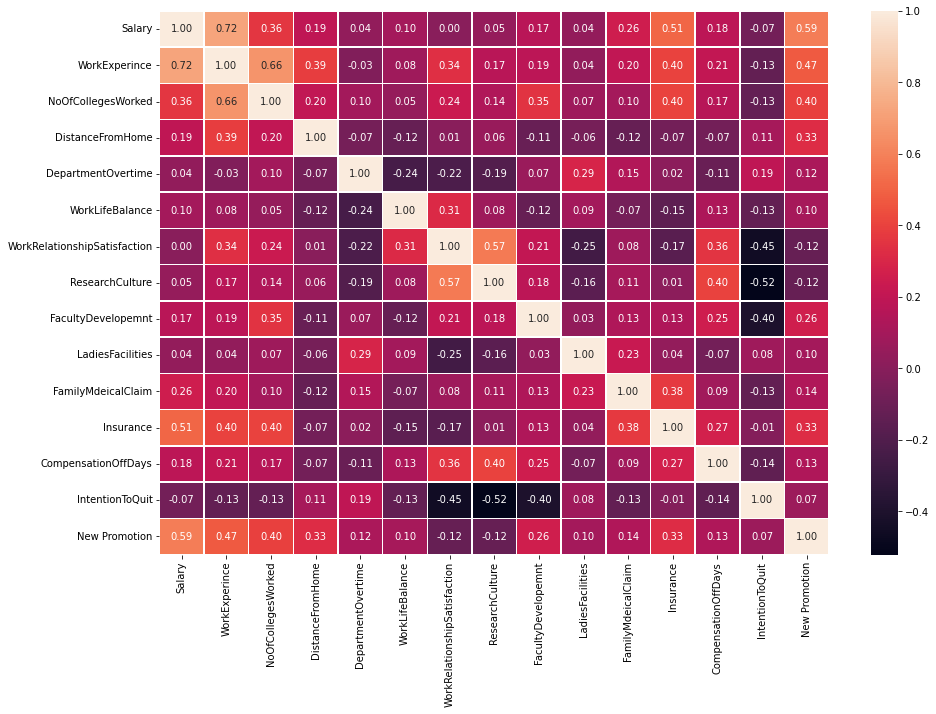

In [ ]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [ ]:
df.to_csv("processed table.csv")

In [ ]:
dataset = pd.read_csv("processed table.csv")
dataset = pd.DataFrame(dataset)
y = dataset["IntentionToQuit"]
X = dataset.drop("IntentionToQuit",axis=1)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,Unnamed: 0,Salary,WorkExperince,NoOfCollegesWorked,DistanceFromHome,DepartmentOvertime,WorkLifeBalance,WorkRelationshipSatisfaction,ResearchCulture,FacultyDevelopemnt,LadiesFacilities,FamilyMdeicalClaim,Insurance,CompensationOffDays,New Promotion
22,22,1,8.1,2,10.0,2,2,2,3,0,1,0,0,0,0
28,28,2,6.0,2,6.0,1,2,5,4,1,1,0,0,1,0
33,33,4,15.1,3,3.0,2,3,4,3,1,1,1,1,1,1
15,15,4,26.0,6,7.0,2,4,5,2,1,1,0,1,1,1
16,16,4,23.0,3,30.0,1,4,5,3,1,0,0,0,0,1


In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [ ]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    print(msg1)

[Logistic Regression] training data accuracy is : 0.825000
[Decision Tree] training data accuracy is : 1.000000
[KNN] training data accuracy is : 0.825000
[SVM] training data accuracy is : 0.925000
[Random Forest] training data accuracy is : 1.000000
[Naive Bayes] training data accuracy is : 0.875000


In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 1.0,
 'KNN classifier': 0.9,
 'Support Vector Machine': 1.0,
 'Random forest': 1.0,
 'Decision tree': 1.0,
 'Naive Bayes': 1.0}

In [ ]:
from sklearn.metrics import classification_report
rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,1.0,0.9,1.0,1.0,1.0,1.0


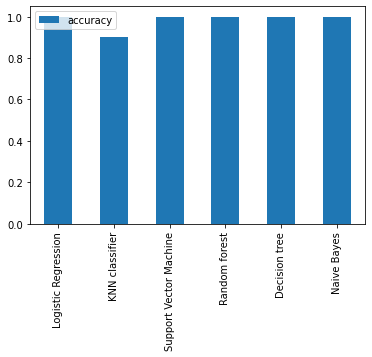

In [ ]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [ ]:
feature_dict=dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

{'Unnamed: 0': -0.014173612573193706,
 'Salary': 0.03211556120352782,
 'WorkExperince': -0.05798470167816529,
 'NoOfCollegesWorked': 0.04295289417802096,
 'DistanceFromHome': 0.06625357642595198,
 'DepartmentOvertime': 0.2714962203661798,
 'WorkLifeBalance': -0.04412372977687428,
 'WorkRelationshipSatisfaction': -0.2490415605212228,
 'ResearchCulture': -0.348826630057167,
 'FacultyDevelopemnt': -0.1404866693900028,
 'LadiesFacilities': 0.0012578757887653537,
 'FamilyMdeicalClaim': -0.033112623593810744,
 'Insurance': 0.023128399934696085,
 'CompensationOffDays': -0.0034915239885587486,
 'IntentionToQuit': 0.06494925783882877}

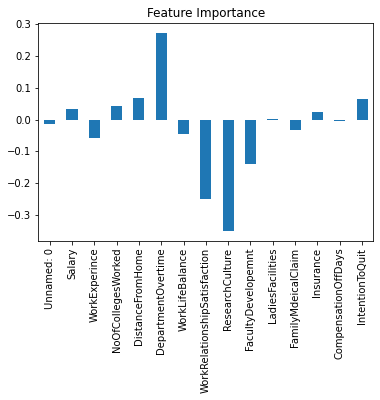

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)

# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])